# Decision Tree Model 

### Installs, Dependencies and Setup

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=4e66bff0aa4edb3eb556af282c8550b600e35b72d0777a7f6d10087033737b5b
  Stored in directory: c:\users\rgoul\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from matplotlib import pyplot as plt
import os

### Read the CSV and Perform Basic Data Cleaning

In [4]:
# Upload Victims of Crime by State and Territories
file_to_load = "Resources/ABS Crime Victim Data.xlsx"

In [5]:
# Age Offence Data
#Homicide and related offences(c) Data
# Males
Homicide_Male = pd.read_excel(file_to_load,skiprows= range(0, 7),nrows=4, usecols = "A:I",sheet_name = 'Table 11').dropna()
Homicide_Male["Gender"] = "Male"
Homicide_Male["Offence"] = "Homicide and related offences"
Homicide_Male.columns = ["Age","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
Homicide_Male  = Homicide_Male.melt(id_vars=['Age','Gender',"Offence"]) 

# Females

Homicide_Female = pd.read_excel(file_to_load,skiprows= range(0, 13),nrows=4, usecols = "A:I",sheet_name = 'Table 11').dropna()
Homicide_Female["Gender"] = "Female"
Homicide_Female["Offence"] = "Homicide and related offences"
Homicide_Female.columns = ["Age","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
Homicide_Female  = Homicide_Female.melt(id_vars=['Age','Gender',"Offence"]) 

# Assault Data
# Males
Assault_Male = pd.read_excel(file_to_load,skiprows= range(0, 26),nrows=9, usecols = "A:I",sheet_name = 'Table 11').dropna()
Assault_Male["Gender"] = "Male"
Assault_Male["Offence"] = "Assault"
Assault_Male.columns = ["Age_old","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
Assault_Male = Assault_Male.melt(id_vars=['Age_old','Gender',"Offence"])
#Group Data into larger age groups to match the other Offence Data
Assault_Male.loc[(Assault_Male['Age_old'] == "0–9 years")|(Assault_Male['Age_old'] == "10–14 years")|(Assault_Male['Age_old'] == "15–19 years"), 'Age'] = '0-19 years' 
Assault_Male.loc[(Assault_Male['Age_old'] == "20–24 years")|(Assault_Male['Age_old'] == "25–34 years"), 'Age'] = '20–34 years' 
Assault_Male.loc[(Assault_Male['Age_old'] == "35–44 years")|(Assault_Male['Age_old'] == "45–54 years"), 'Age'] = '35–54 years' 
Assault_Male.loc[(Assault_Male['Age_old'] == "55–64 years")|(Assault_Male['Age_old'] == "65 years and over"), 'Age'] = '55 years and over' 
Assault_Male = Assault_Male.groupby(['Age','Gender',"Offence","variable"])['value'].sum().reset_index()

# Females
Assault_Female = pd.read_excel(file_to_load,skiprows= range(0, 36),nrows=9, usecols = "A:I",sheet_name = 'Table 11').dropna()
Assault_Female["Gender"] = "Female"
Assault_Female["Offence"] = "Assault"
Assault_Female.columns = ["Age_old","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
Assault_Female = Assault_Female.melt(id_vars=['Age_old','Gender',"Offence"])
#Group Data into larger age groups to match the other Offence Data
Assault_Female.loc[(Assault_Female['Age_old'] == "0–9 years")|(Assault_Female['Age_old'] == "10–14 years")|(Assault_Female['Age_old'] == "15–19 years"), 'Age'] = '0-19 years' 
Assault_Female.loc[(Assault_Female['Age_old'] == "20–24 years")|(Assault_Female['Age_old'] == "25–34 years"), 'Age'] = '20–34 years' 
Assault_Female.loc[(Assault_Female['Age_old'] == "35–44 years")|(Assault_Female['Age_old'] == "45–54 years"), 'Age'] = '35–54 years' 
Assault_Female.loc[(Assault_Female['Age_old'] == "55–64 years")|(Assault_Female['Age_old'] == "65 years and over"), 'Age'] = '55 years and over' 
Assault_Female = Assault_Female.groupby(['Age','Gender',"Offence","variable"])['value'].sum().reset_index()

# Sexual Assault Data
# Males
SAssault_Male = pd.read_excel(file_to_load,skiprows= range(0, 59),nrows=9, usecols = "A:I",sheet_name = 'Table 11').dropna()
SAssault_Male["Gender"] = "Male"
SAssault_Male["Offence"] = "Sexual Assault"
SAssault_Male.columns = ["Age_old","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
SAssault_Male = SAssault_Male.melt(id_vars=['Age_old','Gender',"Offence"])
#Group Data into larger age groups to match the other Offence Data
SAssault_Male.loc[(SAssault_Male['Age_old'] == "0–9 years")|(SAssault_Male['Age_old'] == "10–14 years")|(SAssault_Male['Age_old'] == "15–19 years"), 'Age'] = '0-19 years' 
SAssault_Male.loc[(SAssault_Male['Age_old'] == "20–24 years")|(SAssault_Male['Age_old'] == "25–34 years"), 'Age'] = '20–34 years' 
SAssault_Male.loc[(SAssault_Male['Age_old'] == "35–44 years")|(SAssault_Male['Age_old'] == "45–54 years"), 'Age'] = '35–54 years' 
SAssault_Male.loc[(SAssault_Male['Age_old'] == "55–64 years")|(SAssault_Male['Age_old'] == "65 years and over"), 'Age'] = '55 years and over' 
SAssault_Male = SAssault_Male.groupby(['Age','Gender',"Offence","variable"])['value'].sum().reset_index()

# Females
SAssault_Female = pd.read_excel(file_to_load,skiprows= range(0, 71),nrows=9, usecols = "A:I",sheet_name = 'Table 11').dropna()
SAssault_Female["Gender"] = "Female"
SAssault_Female["Offence"] = "Sexual Assault"
SAssault_Female.columns = ["Age_old","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
SAssault_Female = SAssault_Female.melt(id_vars=['Age_old','Gender',"Offence"])
#Group Data into larger age groups to match the other Offence Data
SAssault_Female.loc[(SAssault_Female['Age_old'] == "0–9 years")|(SAssault_Female['Age_old'] == "10–14 years")|(SAssault_Female['Age_old'] == "15–19 years"), 'Age'] = '0-19 years' 
SAssault_Female.loc[(SAssault_Female['Age_old'] == "20–24 years")|(SAssault_Female['Age_old'] == "25–34 years"), 'Age'] = '20–34 years' 
SAssault_Female.loc[(SAssault_Female['Age_old'] == "35–44 years")|(SAssault_Female['Age_old'] == "45–54 years"), 'Age'] = '35–54 years' 
SAssault_Female.loc[(SAssault_Female['Age_old'] == "55–64 years")|(SAssault_Female['Age_old'] == "65 years and over"), 'Age'] = '55 years and over' 
SAssault_Female = SAssault_Female.groupby(['Age','Gender',"Offence","variable"])['value'].sum().reset_index()

#Kidnapping/abduction(g) Data
# Males
Kidnap_Male = pd.read_excel(file_to_load,skiprows= range(0, 93),nrows=4, usecols = "A:I",sheet_name = 'Table 11').dropna()
Kidnap_Male["Gender"] = "Male"
Kidnap_Male["Offence"] = "Kidnapping/abduction(g) Data"
Kidnap_Male.columns = ["Age","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
Kidnap_Male  = Kidnap_Male.melt(id_vars=['Age','Gender',"Offence"]) 

# Females
Kidnap_Female = pd.read_excel(file_to_load,skiprows= range(0, 100),nrows=4, usecols = "A:I",sheet_name = 'Table 11').dropna()
Kidnap_Female["Gender"] = "Female"
Kidnap_Female["Offence"] = "Kidnapping/abduction(g) Data"
Kidnap_Female.columns = ["Age","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
Kidnap_Female  = Kidnap_Female.melt(id_vars=['Age','Gender',"Offence"]) 

# Robbery Data
# Males
Robbery_Male = pd.read_excel(file_to_load,skiprows= range(0, 112),nrows=9, usecols = "A:I",sheet_name = 'Table 11').dropna()
Robbery_Male["Gender"] = "Male"
Robbery_Male["Offence"] = "Robbery"
Robbery_Male.columns = ["Age_old","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
Robbery_Male = Robbery_Male.melt(id_vars=['Age_old','Gender',"Offence"])
#Group Data into larger age groups to match the other Offence Data
Robbery_Male.loc[(Robbery_Male['Age_old'] == "0–9 years")|(Robbery_Male['Age_old'] == "10–14 years")|(Robbery_Male['Age_old'] == "15–19 years"), 'Age'] = '0-19 years' 
Robbery_Male.loc[(Robbery_Male['Age_old'] == "20–24 years")|(Robbery_Male['Age_old'] == "25–34 years"), 'Age'] = '20–34 years' 
Robbery_Male.loc[(Robbery_Male['Age_old'] == "35–44 years")|(Robbery_Male['Age_old'] == "45–54 years"), 'Age'] = '35–54 years' 
Robbery_Male.loc[(Robbery_Male['Age_old'] == "55–64 years")|(Robbery_Male['Age_old'] == "65 years and over"), 'Age'] = '55 years and over' 
Robbery_Male = Robbery_Male.groupby(['Age','Gender',"Offence","variable"])['value'].sum().reset_index()

# Females
Robbery_Female = pd.read_excel(file_to_load,skiprows= range(0, 124),nrows=9, usecols = "A:I",sheet_name = 'Table 11').dropna()
Robbery_Female["Gender"] = "Female"
Robbery_Female["Offence"] = "Robbery"
Robbery_Female.columns = ["Age_old","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
Robbery_Female = Robbery_Female.melt(id_vars=['Age_old','Gender',"Offence"])
#Group Data into larger age groups to match the other Offence Data
Robbery_Female.loc[(Robbery_Female['Age_old'] == "0–9 years")|(Robbery_Female['Age_old'] == "10–14 years")|(Robbery_Female['Age_old'] == "15–19 years"), 'Age'] = '0-19 years' 
Robbery_Female.loc[(Robbery_Female['Age_old'] == "20–24 years")|(Robbery_Female['Age_old'] == "25–34 years"), 'Age'] = '20–34 years' 
Robbery_Female.loc[(Robbery_Female['Age_old'] == "35–44 years")|(Robbery_Female['Age_old'] == "45–54 years"), 'Age'] = '35–54 years' 
Robbery_Female.loc[(Robbery_Female['Age_old'] == "55–64 years")|(Robbery_Female['Age_old'] == "65 years and over"), 'Age'] = '55 years and over' 
Robbery_Female = Robbery_Female.groupby(['Age','Gender',"Offence","variable"])['value'].sum().reset_index()

#Blackmail/extortion Data
# Males
BlmExt_Male = pd.read_excel(file_to_load,skiprows= range(0, 147),nrows=4, usecols = "A:I",sheet_name = 'Table 11').dropna()
BlmExt_Male["Gender"] = "Male"
BlmExt_Male["Offence"] = "Blackmail Extortion"
BlmExt_Male.columns = ["Age","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
BlmExt_Male  = BlmExt_Male.melt(id_vars=['Age','Gender',"Offence"]) 

# Females

BlmExt_Female = pd.read_excel(file_to_load,skiprows= range(0, 153),nrows=4, usecols = "A:I",sheet_name = 'Table 11').dropna()
BlmExt_Female["Gender"] = "Female"
BlmExt_Female["Offence"] = "Blackmail Extortion"
BlmExt_Female.columns = ["Age","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Gender","Offence"]
BlmExt_Female  = BlmExt_Female.melt(id_vars=['Age','Gender',"Offence"]) 

In [6]:
Model_Data = Homicide_Male.append([Homicide_Female,Assault_Male,Assault_Female,SAssault_Male,SAssault_Female
,Kidnap_Male,Kidnap_Female,Robbery_Male,Robbery_Female,BlmExt_Male,BlmExt_Female])
Model_Data.columns = ['Age','Gender',"Offence","State","Victims"]
Model_Data = Model_Data[["Offence","State",'Age','Gender',"Victims"]]
Model_Data['Victims'] = Model_Data['Victims'].replace(['np','npnp','npnpnp'],0)
pd.set_option('display.max_rows', None)
Model_Data 

,Offence,State,Age,Gender,Victims
0,Homicide and related offences,NSW,0–19 years,Male,0.0
1,Homicide and related offences,NSW,20–34 years,Male,16.0
2,Homicide and related offences,NSW,35–54 years,Male,34.0
3,Homicide and related offences,NSW,55 years and over,Male,9.0
4,Homicide and related offences,VIC,0–19 years,Male,5.0
5,Homicide and related offences,VIC,20–34 years,Male,21.0
6,Homicide and related offences,VIC,35–54 years,Male,26.0
7,Homicide and related offences,VIC,55 years and over,Male,10.0
8,Homicide and related offences,QLD,0–19 years,Male,8.0
9,Homicide and related offences,QLD,20–34 years,Male,17.0


In [7]:
# Get Population Factor to get accurate risk of Crime by State, Gender and Age
file_to_load2 = "Resources/Population_Australia.xls"

#Summary of the Male Population
Population_Males = pd.read_excel(file_to_load2,skiprows= range(0, 5),nrows=108, usecols = "A:I",sheet_name = 'Table_8').dropna()
Population_Males.columns = ["Age_old","NSW","VIC","QLD","SA","WA","TAS","NT","ACT"]

Population_MAge1 = Population_Males[Population_Males['Age_old'].isin(['1','2','3','4',"5-9","10-14","10-14","15-19"])]
Population_MAge1["Age"] = "0-19 years"

Population_MAge2 = Population_Males[Population_Males['Age_old'].isin(["20-24","25-29","30-34"])]
Population_MAge2["Age"] = "20–34 years"

Population_MAge3 = Population_Males[Population_Males['Age_old'].isin(["35-39","40-44","45-49","50-54"])]
Population_MAge3["Age"] = "35–54 years"

Population_MAge4 = Population_Males[Population_Males['Age_old'].isin(["55-59","60-64","65-69","70-74","75-79","80-84",                                                                  
                                                                      "85-89","90-94","95-99","100 and over"])]
Population_MAge4["Age"] = "55 years and over"
Population_MAge = Population_MAge1.append([Population_MAge2,Population_MAge3,Population_MAge4])
Population_MAge.columns = ["Age_old","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Age"]
Population_MAge = Population_MAge.drop(columns=['Age_old'])
Population_MAge  = Population_MAge.melt(id_vars=['Age']).dropna()
Population_MAge = Population_MAge.groupby(['Age','variable'])['value'].sum().reset_index()
Population_MAge["Gender"] = "Male"
Population_MAge.columns = ["Age","State","Population","Gender"]
Population_MAge

#Summary of the Female Population

Population_Females = pd.read_excel(file_to_load2,skiprows= range(0, 113),nrows=108, usecols = "A:I",sheet_name = 'Table_8').dropna()
Population_Females.columns = ["Age_old","NSW","VIC","QLD","SA","WA","TAS","NT","ACT"]

Population_FAge1 = Population_Females[Population_Females['Age_old'].isin(['1','2','3','4',"5-9","10-14","10-14","15-19"])]
Population_FAge1["Age"] = "0-19 years"

Population_FAge2 = Population_Females[Population_Females['Age_old'].isin(["20-24","25-29","30-34"])]
Population_FAge2["Age"] = "20–34 years"

Population_FAge3 = Population_Females[Population_Females['Age_old'].isin(["35-39","40-44","45-49","50-54"])]
Population_FAge3["Age"] = "35–54 years"

Population_FAge4 = Population_Females[Population_Females['Age_old'].isin(["55-59","60-64","65-69","70-74","75-79","80-84",                                                                  
                                                                      "85-89","90-94","95-99","100 and over"])]
Population_FAge4["Age"] = "55 years and over"
Population_FAge = Population_FAge1.append([Population_FAge2,Population_FAge3,Population_FAge4])
Population_FAge.columns = ["Age_old","NSW","VIC","QLD","SA","WA","TAS","NT","ACT","Age"]
Population_FAge = Population_FAge.drop(columns=['Age_old'])
Population_FAge  = Population_FAge.melt(id_vars=['Age']).dropna()
Population_FAge = Population_FAge.groupby(['Age','variable'])['value'].sum().reset_index()
Population_FAge["Gender"] = "Female"
Population_FAge.columns = ["Age","State","Population","Gender"]
Population_MAge

Total_Pop = Population_MAge.append(Population_FAge)
Total_Pop.head(20)

<ipython-input-7-c9596dc49052>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Population_MAge1["Age"] = "0-19 years"
<ipython-input-7-c9596dc49052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Population_MAge2["Age"] = "20–34 years"
<ipython-input-7-c9596dc49052>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,Age,State,Population,Gender
0,0-19 years,ACT,52188.0,Male
1,0-19 years,NSW,967110.0,Male
2,0-19 years,NT,33210.0,Male
3,0-19 years,QLD,644765.0,Male
4,0-19 years,SA,201481.0,Male
5,0-19 years,TAS,61582.0,Male
6,0-19 years,VIC,778338.0,Male
7,0-19 years,WA,327529.0,Male
8,20–34 years,ACT,50271.0,Male
9,20–34 years,NSW,888620.0,Male


In [8]:
# Combine Population information to the Model Data 
Model_Pop_Data = pd.merge(Model_Data ,Total_Pop,on = ["Age","State","Gender"])
Model_Pop_Data["VicbyPop"] = (Model_Pop_Data["Victims"]/Model_Pop_Data["Population"])
Model_Pop_Data

,Offence,State,Age,Gender,Victims,Population,VicbyPop
0,Homicide and related offences,NSW,20–34 years,Male,16.0,888620.0,0.000018
1,Assault,NSW,20–34 years,Male,11876.0,888620.0,0.013365
2,Sexual Assault,NSW,20–34 years,Male,276.0,888620.0,0.000311
3,Kidnapping/abduction(g) Data,NSW,20–34 years,Male,36.0,888620.0,0.000041
4,Robbery,NSW,20–34 years,Male,669.0,888620.0,0.000753
5,Blackmail Extortion,NSW,20–34 years,Male,32.0,888620.0,0.000036
6,Homicide and related offences,NSW,35–54 years,Male,34.0,1041631.0,0.000033
7,Assault,NSW,35–54 years,Male,11073.0,1041631.0,0.010630
8,Sexual Assault,NSW,35–54 years,Male,317.0,1041631.0,0.000304
9,Kidnapping/abduction(g) Data,NSW,35–54 years,Male,27.0,1041631.0,0.000026


In [9]:
# Get Min Max Values for each Offence 
Victims_Data = Model_Pop_Data.groupby('Offence').agg({'VicbyPop' : ['mean','min','max','std']})
Model_Data1 = pd.merge(Model_Pop_Data ,Victims_Data,on = "Offence",how = 'left')
Model_Data1.columns = ["Offence","State","Age","Gender","Victims","Population","VictimsbyPop","Mean","Min","Max","Std"]
Model_Data1['Likelihood Measure'] = np.where(Model_Data1['VictimsbyPop'] >= Model_Data1['Mean'], 1, 0)
Model_Data1

C:\Users\rgoul\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Offence,State,Age,Gender,Victims,Population,VictimsbyPop,Mean,Min,Max,Std,Likelihood Measure
0,Homicide and related offences,NSW,20–34 years,Male,16.0,888620.0,0.000018,0.000017,0.0,0.000098,0.000022,1
1,Assault,NSW,20–34 years,Male,11876.0,888620.0,0.013365,0.009501,0.0,0.079645,0.013500,1
2,Sexual Assault,NSW,20–34 years,Male,276.0,888620.0,0.000311,0.001045,0.0,0.006699,0.001365,0
3,Kidnapping/abduction(g) Data,NSW,20–34 years,Male,36.0,888620.0,0.000041,0.000011,0.0,0.000075,0.000018,1
4,Robbery,NSW,20–34 years,Male,669.0,888620.0,0.000753,0.000333,0.0,0.001457,0.000307,1
5,Blackmail Extortion,NSW,20–34 years,Male,32.0,888620.0,0.000036,0.000015,0.0,0.000068,0.000020,1
6,Homicide and related offences,NSW,35–54 years,Male,34.0,1041631.0,0.000033,0.000017,0.0,0.000098,0.000022,1
7,Assault,NSW,35–54 years,Male,11073.0,1041631.0,0.010630,0.009501,0.0,0.079645,0.013500,1
8,Sexual Assault,NSW,35–54 years,Male,317.0,1041631.0,0.000304,0.001045,0.0,0.006699,0.001365,0
9,Kidnapping/abduction(g) Data,NSW,35–54 years,Male,27.0,1041631.0,0.000026,0.000011,0.0,0.000075,0.000018,1


In [10]:
#Final Model Dataset
Final_Model_Data = Model_Data1.drop(columns=['Min','Max','Std','Mean','VictimsbyPop','Population','Victims'])
Final_Model_Data = Final_Model_Data.sort_values(by=['Offence','State','Age','Gender','Likelihood Measure'])
Final_Model_Data

,Offence,State,Age,Gender,Likelihood Measure
304,Assault,ACT,0-19 years,Female,0
280,Assault,ACT,0-19 years,Male,0
263,Assault,ACT,20–34 years,Female,0
120,Assault,ACT,20–34 years,Male,0
269,Assault,ACT,35–54 years,Female,0
126,Assault,ACT,35–54 years,Male,0
275,Assault,ACT,55 years and over,Female,0
132,Assault,ACT,55 years and over,Male,0
307,Assault,NSW,0-19 years,Female,0
283,Assault,NSW,0-19 years,Male,0


In [11]:
offence = Final_Model_Data["Offence"].unique()
offence

array(['Assault', 'Blackmail Extortion', 'Homicide and related offences',
       'Kidnapping/abduction(g) Data', 'Robbery', 'Sexual Assault'],
      dtype=object)

In [12]:
state = Final_Model_Data["State"].unique()
state

array(['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'], dtype=object)

In [13]:
gender = Final_Model_Data["Gender"].unique()
gender

array(['Female', 'Male'], dtype=object)

In [14]:
age = Final_Model_Data["Age"].unique()
age

array(['0-19 years', '20–34 years', '35–54 years', '55 years and over'],
      dtype=object)

In [15]:
# Final_Model_Data_csv = Final_Model_Data.to_csv('Resources/Final_Model_Data.csv')

In [16]:
# Decision Tree Model
target = Final_Model_Data["Likelihood Measure"]
target_names = ["Likely", "Unlikely"]

data = Final_Model_Data.drop("Likelihood Measure", axis=1)
feature_names = ["Offence", "State","Age","Gender"]
data.head()
#pd.set_option('display.max_rows', None)
#print(data)

,Offence,State,Age,Gender
304,Assault,ACT,0-19 years,Female
280,Assault,ACT,0-19 years,Male
263,Assault,ACT,20–34 years,Female
120,Assault,ACT,20–34 years,Male
269,Assault,ACT,35–54 years,Female


In [17]:
from sklearn.feature_extraction import DictVectorizer

X_dict = data.T.to_dict().values()

vect = DictVectorizer(sparse=False)
X_vector = vect.fit_transform(X_dict)

X_dict
X_vector

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Create a Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vector, target)

In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6707317073170732

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7804878048780488

In [21]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.08653534683062498, 'Gender'),
 (0.05392043215001733, 'State'),
 (0.04114595816220523, 'Age'),
 (0.03393804639505689, 'Offence')]

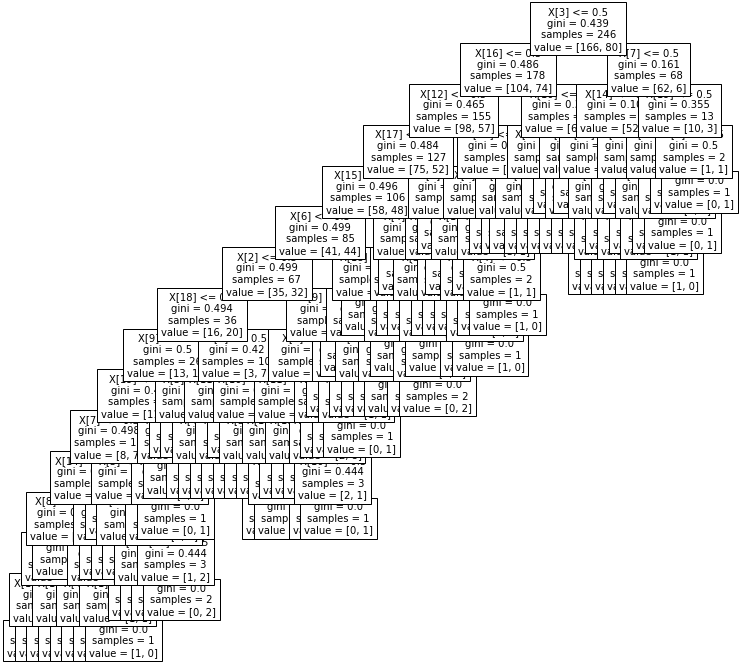

In [22]:
# plot tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

### Save the Model

In [25]:
import joblib
joblib.dump(rf, "model.pkl")

['model.pkl']

In [26]:
model_reimport = joblib.load("model.pkl")
model_reimport.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])